In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('dados/df_vinho.csv')

In [3]:
dados

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,álcool,qualidade
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,mediano
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,mediano
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,mediano
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,mediano
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,mediano
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,mediano
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,mediano
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,mediano
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,mediano


In [25]:
dados['qualidade'].value_counts()

qualidade
mediano    1112
bom         184
ruim         63
Name: count, dtype: int64

In [4]:
x = dados.drop(['qualidade'],axis=1)
y = dados['qualidade']

In [5]:
#agora vamos separar os dados de ensino, validacao e teste final
from sklearn.model_selection import train_test_split

In [6]:
#aqui separamos o dado que sera usado la no final, para teste com dados desconhecidos
x, x_teste,y, y_teste = train_test_split(x,y,test_size=0.15,stratify=y,random_state=0)

#aqui pegamos daods para treinar e validar a machine learning (sem usar o size, fica com 25%)
x_treino,x_validacao,y_treino,y_validacao = train_test_split(x,y,stratify=y,random_state=0)

In [7]:
#aqui importamos a arvore de logica

from sklearn.ensemble import RandomForestClassifier

In [9]:
modeloArvore = RandomForestClassifier(random_state=0)
modeloArvore.fit(x_treino,y_treino)
#até aqui ensinamos com base na fatia de treino que separamos

y_predicao = modeloArvore.predict(x_validacao) #aqui, criamos uma predicao (adivinhamos o valor de y, usando o x)

print(f'acuracia de teste:{modeloArvore.score(x_teste,y_teste)}')
print(f'acuracia de validacao:{modeloArvore.score(x_validacao,y_validacao)}')


acuracia de teste:0.8333333333333334
acuracia de validacao:0.8339100346020761


In [10]:
modeloArvore = RandomForestClassifier(random_state=0,max_depth=10)
modeloArvore.fit(x_treino,y_treino)
#até aqui ensinamos com base na fatia de treino que separamos

y_predicao = modeloArvore.predict(x_validacao) #aqui, criamos uma predicao (adivinhamos o valor de y, usando o x)

print(f'acuracia de teste:{modeloArvore.score(x_teste,y_teste)}')
print(f'acuracia de validacao:{modeloArvore.score(x_validacao,y_validacao)}')


acuracia de teste:0.8382352941176471
acuracia de validacao:0.8442906574394463


In [12]:
#agora vamos comecar a avaliar melhor, com matriz de confusao
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

In [14]:
matrixDeConfusao = confusion_matrix(y_validacao,y_predicao)


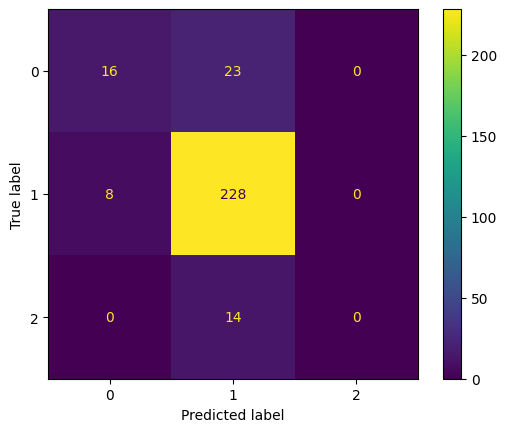

In [17]:
#agora vamos visualizar a amtrix de confusao

visualizacao = ConfusionMatrixDisplay(confusion_matrix=matrixDeConfusao)
visualizacao.plot()

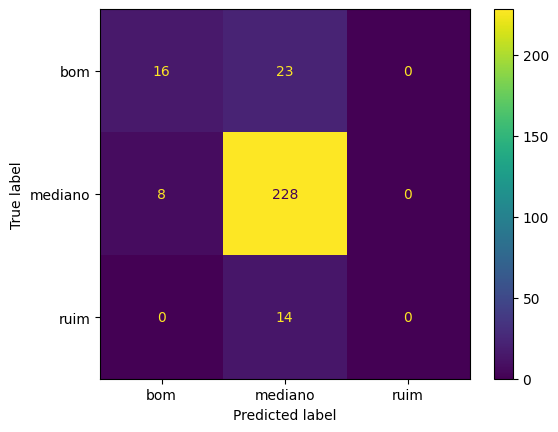

In [19]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matrixDeConfusao,display_labels=modeloArvore.classes_,)
visualizacao.plot()

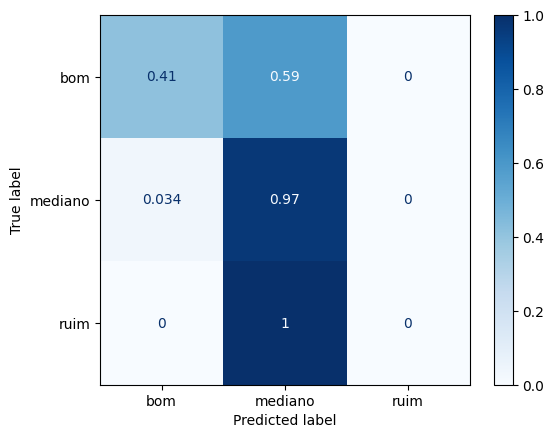

In [22]:
ConfusionMatrixDisplay.from_predictions(y_validacao,y_predicao,normalize='true',cmap='Blues')

In [23]:
#agora vamos pegar um report
from sklearn.metrics import classification_report

In [26]:
report = classification_report(y_validacao,y_predicao)
print('o resultado da validacao foi este\n',report);

o resultado da validacao foi este
               precision    recall  f1-score   support

         bom       0.67      0.41      0.51        39
     mediano       0.86      0.97      0.91       236
        ruim       0.00      0.00      0.00        14

    accuracy                           0.84       289
   macro avg       0.51      0.46      0.47       289
weighted avg       0.79      0.84      0.81       289



/Users/gabrielnetto/Documents/Machine_learning/solo1/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gabrielnetto/Documents/Machine_learning/solo1/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gabrielnetto/Documents/Machine_learning/solo1/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

In [27]:
from imblearn.over_sampling import SMOTE

In [31]:
#entendendo o padrao e criando dados novos e sintéticos
oversample = SMOTE(random_state=0)
x_balanceado,y_balanceado = oversample.fit_resample(x_teste,y_teste)
y_balanceado.value_counts()

qualidade
mediano    167
ruim       167
bom        167
Name: count, dtype: int64

In [32]:
#agora criamos um modelo novo a partir destes dados

modeloNovo = RandomForestClassifier(random_state=0,max_depth=10)

modeloNovo.fit(x_balanceado,y_balanceado)
yNovo_pred = modeloNovo.predict(x_validacao)

In [33]:
#agora vamos pegar as metricas
print(classification_report(y_validacao,yNovo_pred))

              precision    recall  f1-score   support

         bom       0.40      0.59      0.48        39
     mediano       0.88      0.81      0.84       236
        ruim       0.13      0.14      0.14        14

    accuracy                           0.74       289
   macro avg       0.47      0.51      0.49       289
weighted avg       0.78      0.74      0.76       289



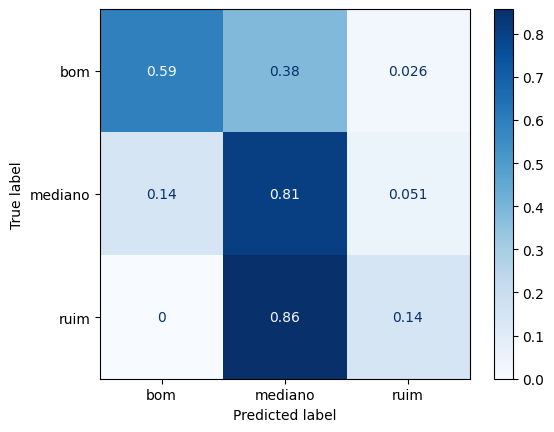

In [37]:
ConfusionMatrixDisplay.from_predictions(y_validacao,yNovo_pred,normalize='true',cmap='Blues')

In [38]:
from imblearn.pipeline import Pipeline as Pipgrafico

In [40]:
modeloPip = RandomForestClassifier(max_depth=10)
pipeline2 = Pipgrafico([('oversample',SMOTE()),('modelo',modeloPip)])

In [41]:
from sklearn.model_selection import cross_validate,StratifiedKFold

In [42]:
#aqui colocamos quantas sub divisoes de teste criaremos (usando N_spits)
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
resultado = cross_validate(pipeline2,x,y,cv=skf,scoring='recall_weighted')
resultado['test_score']

array([0.74025974, 0.74025974, 0.72727273, 0.76623377, 0.75757576])

In [48]:
mediaFinal = resultado['test_score'].mean()
desvioPadrao = resultado['test_score'].std()

print(f'o desvio padrao final ficou assim: [{mediaFinal -2*desvioPadrao} -{mediaFinal +2*desvioPadrao}]')

o desvio padrao final ficou assim: [0.7186147186147186 -0.774025974025974]


In [49]:
#até aqui fizemos apenas com os dados de ensino e validacao


              precision    recall  f1-score   support

         bom       0.49      0.61      0.54        28
     mediano       0.90      0.83      0.86       167
        ruim       0.31      0.56      0.40         9

    accuracy                           0.78       204
   macro avg       0.57      0.66      0.60       204
weighted avg       0.82      0.78      0.80       204



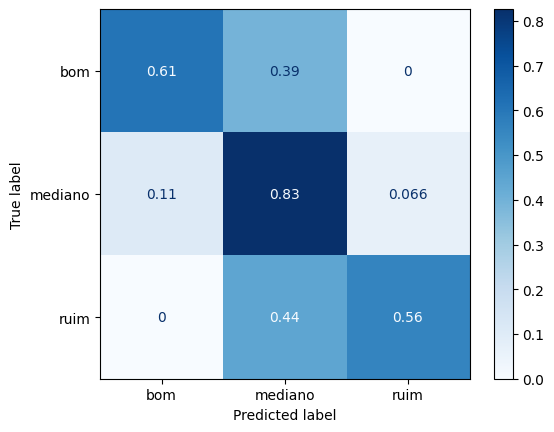

In [50]:
oversampleFinal = SMOTE(random_state=0)
x_balanceadonovo2,y_balanceadonovo2 = oversample.fit_resample(x,y)
modelo = RandomForestClassifier(max_depth=10,random_state=0)
modelo.fit(x_balanceadonovo2,y_balanceadonovo2)
y_prednovo2 = modelo.predict(x_teste)
print(classification_report(y_teste,y_prednovo2))
ConfusionMatrixDisplay.from_predictions(y_teste,y_prednovo2,normalize='true',cmap='Blues')
